/tmp/ipykernel_20891/1551716430.py:23: RuntimeWarning: invalid value encountered in true_divide
  weights[j, j] = exp(diffMat * diffMat.T / (-2.0 *j ** 2))
/home/mapple/.local/lib/python3.10/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
/tmp/ipykernel_20891/1551716430.py:23: RuntimeWarning: divide by zero encountered in true_divide
  weights[j, j] = exp(diffMat * diffMat.T / (-2.0 *j ** 2))


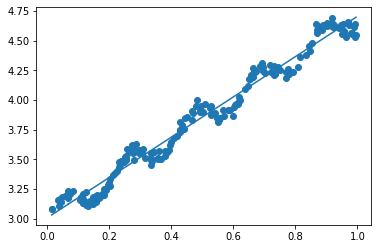

In [11]:
from numpy import *
import operator

def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t')) - 1
    dataMat = []; labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat, labelMat

def lwlr(testPoint, xArr, yArr, k=1.0):
    xMat = mat(xArr); yMat = mat(yArr).T
    m = shape(xMat)[0]
    weights = mat(eye((m)))
    for j in range(m):
        diffMat = testPoint - xMat[j, :]
        weights[j, j] = exp(diffMat * diffMat.T / (-2.0 *j ** 2))
    xTx = xMat.T * (weights * xMat)
    if linalg.det(xTx) == 0.0:
        print("This matrix is singular, cannot do inverse")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

def lwlrTest(testArr, xArr, yArr, k=1.0):
    m = shape(testArr)[0]
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i], xArr, yArr, k)
    return yHat

xArr, yArr = loadDataSet('../resource/ex0.txt')
# lwlr(xArr[0], xArr, yArr, 1.0)
# lwlr(xArr[0], xArr, yArr, 0.001)
yHat = lwlrTest(xArr, xArr, yArr, 0.001)
xMat = mat(xArr)
srtInd = xMat[:, 1].argsort(0)
xSort = xMat[srtInd][:, 0, :]
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(xSort[:, 1], yHat[srtInd])
ax.scatter(xMat[:,1].flatten().A[0], mat(yArr).T[:,0].flatten().A[0])
plt.show()